In [1]:
!python -m pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 4.4 MB/s            
     |████████████████████████████████| 489.6 MB 19 kB/s               
     |████████████████████████████████| 463 kB 61.2 MB/s            
     |████████████████████████████████| 13.4 MB 31.6 MB/s            
     |████████████████████████████████| 1.3 MB 47.3 MB/s            
     |████████████████████████████████| 2.1 MB 39.4 MB/s            
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.2
    Uninstalling tensorflow-2.6.2:
      Successfully uninstalled tensorflow-2.6.2
ERROR: pip's dependency resolver does not currently take in

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

2021-12-22 19:17:49.956458: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2021-12-22 19:17:49.956559: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("../input/sms-spam-collection-dataset/spam.csv", encoding="ISO-8859-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [9]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [10]:
747/4825

0.15481865284974095

In [11]:
df_spam=df[df['v1']=='spam']
df_spam.shape

(747, 2)

In [12]:
df_ham=df[df['v1']=='ham']
df_ham.shape

(4825, 2)

In [13]:
df_ham.sample(2)

,v1,v2
1060,ham,I'm working technical support :)voice process....
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...


In [14]:
df_ham_downsampled=df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape


(747, 2)

In [15]:
df_balanced=pd.concat([df_spam,df_ham_downsampled])
df_balanced.shape

(1494, 2)

In [16]:
df_balanced['v1'].value_counts()

spam    747
ham     747
Name: v1, dtype: int64

In [17]:
df_balanced.sample(5)

,v1,v2
1090,spam,WIN URGENT! Your mobile number has been awarde...
21,ham,IÛ÷m going to try for 2 months ha ha only joking
3142,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...
472,ham,Nothing. I meant that once the money enters yo...
3220,spam,"Thanks for your ringtone order, reference numb..."


In [18]:
df_balanced['spam']=df_balanced['v1'].apply(lambda x:1 if x=='spam' else 0)
df_balanced.sample(10)

,v1,v2,spam
3774,ham,Hi! You just spoke to MANEESHA V. We'd like to...,0
1690,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,1
5147,spam,Get your garden ready for summer with a FREE s...,1
5250,spam,Urgent! Please call 09061213237 from a landlin...,1
4894,spam,Want the latest Video handset? 750 anytime any...,1
4014,spam,You will be receiving this week's Triple Echo ...,1
1740,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...,1
4629,ham,Everybody had fun this evening. Miss you.,0
3260,ham,Yup i'm still having coffee wif my frens... My...,0
4152,spam,URGENT!! Your 4* Costa Del Sol Holiday or å£50...,1


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_balanced['v2'],df_balanced['spam'],stratify=df_balanced['spam'])

In [20]:
X_train.head(4)

54      SMS. ac Sptv: The New Jersey Devils and the De...
4164    Dear Voucher Holder, To claim this weeks offer...
2094    PRIVATE! Your 2004 Account Statement for 07742...
3748    Dear Voucher Holder 2 claim your 1st class air...
Name: v2, dtype: object

In [21]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

2021-12-22 19:18:05.270561: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2021-12-22 19:18:05.270633: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-22 19:18:05.270662: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d3327877fa05): /proc/driver/nvidia/version does not exist
2021-12-22 19:18:05.271034: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

In [22]:
def get_sentence_embeding(sentences):
    preprocessed_text=bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount.hurry up",
    "Bhavin,are you up for a volleybal game tomorrow?"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435169 , -0.5132725 , -0.88845724, ..., -0.74748874,
        -0.7531473 ,  0.91964495],
       [-0.8720836 , -0.5054398 , -0.9444667 , ..., -0.8584752 ,
        -0.7174535 ,  0.8808299 ]], dtype=float32)>

In [23]:
e=get_sentence_embeding([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    'elon musk',
    'bill gates'
])

In [24]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606919 , -0.14219391,  0.49604574, ...,  0.42165303,
        -0.5322141 ,  0.80312175],
       [-0.86023235, -0.21242976,  0.49156845, ...,  0.39797997,
        -0.6050632 ,  0.8447167 ],
       [-0.7128862 , -0.15463905,  0.3840169 , ...,  0.35278746,
        -0.5099134 ,  0.734741  ],
       [-0.8253345 , -0.35550553, -0.5906968 , ..., -0.0161373 ,
        -0.6141755 ,  0.87230295],
       [-0.75041324, -0.2681262 , -0.2668968 , ...,  0.02839376,
        -0.5938099 ,  0.7974986 ],
       [-0.7854438 , -0.2994968 ,  0.41027415, ...,  0.52225393,
        -0.49573544,  0.815075  ]], dtype=float32)>

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])


array([[0.9911088]], dtype=float32)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[3]])

array([[0.84703857]], dtype=float32)

In [27]:
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessed_text=bert_preprocess(text_input)
outputs=bert_encoder(preprocessed_text)

l=tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
l=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)


model=tf.keras.Model(inputs=[text_input],outputs=[l])

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [29]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
    
    
]

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=METRICS)

In [30]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
35/35 [==============================] - 292s 8s/step - loss: 0.6902 - accuracy: 0.5955 - precision: 0.5915 - recall: 0.6179
Epoch 2/10
35/35 [==============================] - 286s 8s/step - loss: 0.5312 - accuracy: 0.7893 - precision: 0.8164 - recall: 0.7464
Epoch 3/10
35/35 [==============================] - 280s 8s/step - loss: 0.4598 - accuracy: 0.8375 - precision: 0.8203 - recall: 0.8643
Epoch 4/10
35/35 [==============================] - 280s 8s/step - loss: 0.4076 - accuracy: 0.8750 - precision: 0.8723 - recall: 0.8786
Epoch 5/10
35/35 [==============================] - 289s 8s/step - loss: 0.3709 - accuracy: 0.8875 - precision: 0.8716 - recall: 0.9089
Epoch 6/10
35/35 [==============================] - 282s 8s/step - loss: 0.3446 - accuracy: 0.8857 - precision: 0.8686 - recall: 0.9089
Epoch 7/10
35/35 [==============================] - 288s 8s/step - loss: 0.3261 - accuracy: 0.8938 - precision: 0.8875 - recall: 0.9018
Epoch 8/10
35/35 [==============================

In [31]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 96s 8s/step - loss: 0.2943 - accuracy: 0.9011 - precision: 0.8788 - recall: 0.9305


[0.29425379633903503,
 0.9010695219039917,
 0.8787878751754761,
 0.9304812550544739]

In [32]:
y_predicted=model.predict(X_test)
y_predicted=y_predicted.flatten()

In [33]:
import numpy as np

y_predicted=np.where(y_predicted >0.5,1,0)

y_predicted

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_predicted)
cm

array([[163,  24],
       [ 13, 174]])

Text(33.0, 0.5, 'Truth')

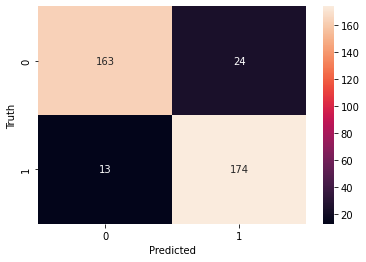

In [35]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       187
           1       0.88      0.93      0.90       187

    accuracy                           0.90       374
   macro avg       0.90      0.90      0.90       374
weighted avg       0.90      0.90      0.90       374

